*Data Science Course - Telkom Digital Talent Incubator*

---

# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

# Pie Sales Prediction with Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [2]:
# Pie Sales
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


### Exploratory Data Analysis

In [3]:
# Exploratory data analysis
df_pie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


In [4]:
# cek korelasi
df_pie.corr()['pie_sales'].sort_values(ascending=False)

pie_sales      1.000000
advertising    0.556320
week          -0.067887
price         -0.443273
Name: pie_sales, dtype: float64

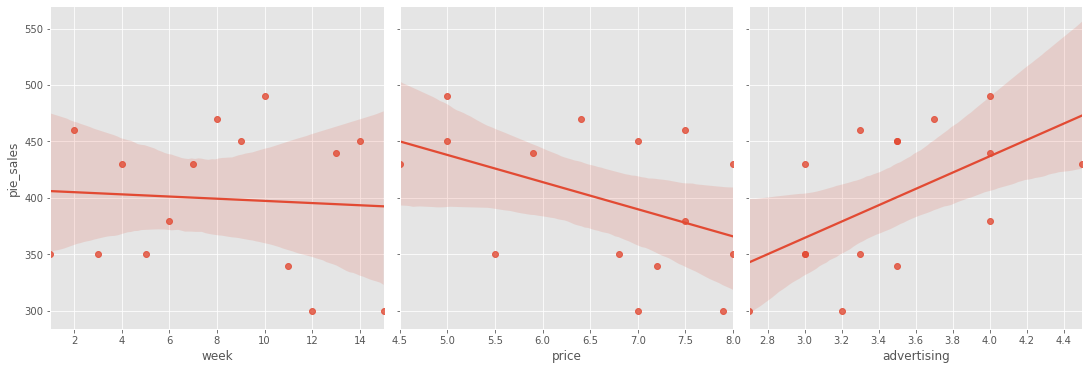

In [5]:
g = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["week", "price","advertising"], height=5)
g.map(sns.regplot)

Dari gambar diatas dapat disimpulkan bahwa week dan price memiliki korelasi yang cenderung negatif, dan advertising memiliki korelasi cenderung positif terhadap pie_sales. 

Namun karena week adalah variabel time series yang artinya tidak dapat dikendalikan. Maka week tidak akan dimasukkan sebagai feature dalam model.

### Linear Model with SKLearn

In [6]:
x = df_pie.drop(['pie_sales','week'],axis=1)
y = df_pie['pie_sales']

In [7]:
# training model
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [8]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [9]:
dfc = pd.DataFrame(regr.coef_,x.columns)
dfc.columns=['Coefficients']
dfc

,Coefficients
price,-24.975090
advertising,74.130957


In [10]:
print(f'Formula : {round(regr.intercept_,3)} - {round(regr.coef_[0]*-1,2)}({x.columns[0]}) + {round(regr.coef_[1],2)}({x.columns[1]})')

Formula : 306.526 - 24.98(price) + 74.13(advertising)


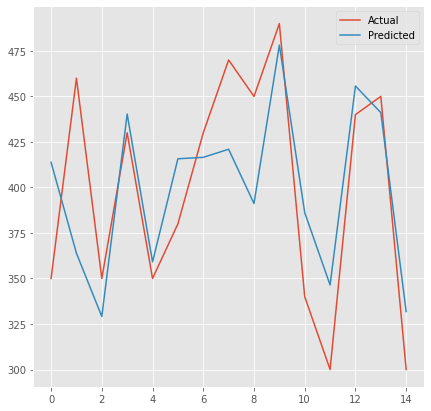

In [11]:
y_predict = regr.predict(x)
plt.plot(range(0,len(x)),y,label='Actual')
plt.plot(range(0,len(x)),y_predict,label='Predicted')
plt.legend()

In [12]:
print('Mean Absolute Error     : ', mean_absolute_error(y, y_predict))  
print('Mean Squared Error      : ', mean_squared_error(y, y_predict))  
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y, y_predict)))

Mean Absolute Error     :  34.54567364769344
Mean Squared Error      :  1802.2204311503622
Root Mean Squared Error :  42.45256683818261


### Linear Model with Statsmodel

In [13]:
x_constant = sm.add_constant(x) # adding a constant

model = sm.OLS(y,x_constant).fit()
predictions = model.predict(x_constant) 

In [14]:
x.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [15]:
x_constant.head()

,const,price,advertising
0,1.0,5.5,3.3
1,1.0,7.5,3.3
2,1.0,8.0,3.0
3,1.0,8.0,4.5
4,1.0,6.8,3.0


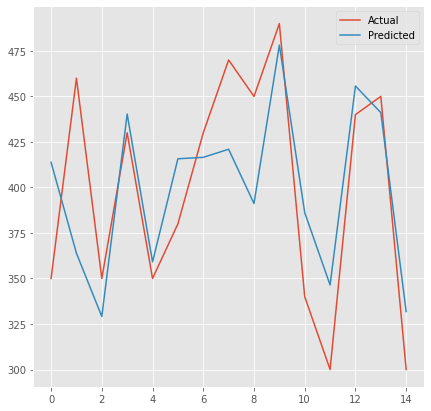

In [16]:
y_predict = model.predict(x_constant)
plt.plot(range(0,len(x)),y,label='Actual')
plt.plot(range(0,len(x)),y_predict,label='Predicted')
plt.legend()

In [17]:
print('Mean Absolute Error     : ', mean_absolute_error(y, y_predict))  
print('Mean Squared Error      : ', mean_squared_error(y, y_predict))  
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y, y_predict)))

Mean Absolute Error     :  34.545673647693434
Mean Squared Error      :  1802.2204311503629
Root Mean Squared Error :  42.45256683818262


In [18]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        07:50:01   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

### Kesimpulan

Dari hasil akurasi diatas dapat dilihat bahwa nilai mae, mse, dan rmse yang cenderung rendah artinya model cukup baik. 